In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Necessary Packages

In [2]:
import pandas as pd
import numpy as np


## Reading the data from csv file and exploring the data

In [ ]:
tt=pd.read_csv('/content/drive/MyDrive/Remote sensing project/blr_real_estate_prices.csv')

In [3]:
train=pd.read_csv('/content/drive/MyDrive/Remote sensing project/blr_real_estate_prices.csv')

In [4]:
train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
train.dtypes


area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [6]:
train.shape

(13320, 9)

In [7]:
train.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
train['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [9]:
train['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
17-Jan               1
16-Jan               1
14-Jul               1
15-Jun               1
14-Nov               1
Name: availability, Length: 81, dtype: int64

In [10]:
train['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Banaswadi,                          1
Nanjappa Layout Vidyaranyapura      1
Virgonagar                          1
Zuzuvadi                            1
Subbannaiah Palya                   1
Name: location, Length: 1305, dtype: int64

In [11]:
train['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 Bedroom       2
10 BHK           2
11 BHK           2
13 BHK           1
16 BHK           1
12 Bedroom       1
19 BHK           1
43 Bedroom       1
27 BHK           1
18 Bedroom       1
14 BHK           1
Name: size, dtype: int64

In [12]:
train['society'].value_counts()

GrrvaGr    80
PrarePa    76
Prtates    59
Sryalan    59
GMown E    56
           ..
DSersus     1
Dheusag     1
SoineJa     1
Coise P     1
Hemai D     1
Name: society, Length: 2688, dtype: int64

In [13]:
train['bath'].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
18.0       1
40.0       1
15.0       1
14.0       1
Name: bath, dtype: int64

In [14]:
train['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [15]:
train['location'].fillna('Sarjapur  Road',inplace=True)

# Imputing with only plot category , because this is an empty plot area

In [16]:
train['size'].fillna('only plot',inplace=True)
train[train['size']=='only plot']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,only plot,Asiss B,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,Immediate Possession,IVC Road,only plot,Orana N,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Immediate Possession,Banashankari,only plot,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,only plot,AsdiaAr,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Immediate Possession,Devanahalli,only plot,Ajleyor,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Immediate Possession,Devanahalli,only plot,Emngs S,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Immediate Possession,Whitefield,only plot,SRniaGa,2324,NaN,NaN,26.730
6636,Plot Area,Immediate Possession,Jigani,only plot,S2enste,1500,NaN,NaN,25.490
6719,Plot Area,Immediate Possession,Hoskote,only plot,SJowsn,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,only plot,NaN,5000,NaN,NaN,400.000


## Filling the NAN's with Indepedent building catetogry 

In [17]:
train['society'].fillna('Independent Buildings',inplace=True)
train['society'].unique

<bound method Series.unique of 0                      Coomee 
1                      Theanmp
2        Independent Buildings
3                      Soiewre
4        Independent Buildings
                 ...          
13315                  ArsiaEx
13316    Independent Buildings
13317                  Mahla T
13318                  SollyCl
13319    Independent Buildings
Name: society, Length: 13320, dtype: object>

In [18]:
train.loc[train[train['size']=='only plot'].index]['bath'].fillna('No Bath',inplace=True)

In [19]:
train.drop(train[train['size']=='only plot'].index,axis=0,inplace=True)

In [20]:
train['size']=train['size'].astype('category')

In [21]:
train['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 Bedroom       2
10 BHK           2
11 BHK           2
43 Bedroom       1
13 BHK           1
12 Bedroom       1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
27 BHK           1
Name: size, dtype: int64

In [22]:
train['size']=train['size'].str.replace('Bedroom','BHK')

In [23]:
train['total_sqft']=train['total_sqft'].astype('category')
train['total_sqft'].value_counts()

1200           843
1100           221
1500           204
2400           195
600            180
              ... 
1701             1
3410             1
3425 - 3435      1
3435             1
1                1
Name: total_sqft, Length: 2110, dtype: int64

## Code to convert text to int values and convert range of sqft to avg value

In [24]:
train['avg_sqft']=train['total_sqft'].str.extract('(\d+)').astype('int')

In [25]:
def mean(lis):
  #print((float(lis[0])+float(lis[1]))/2)
  avg=((float(lis[0])+float(lis[1]))/2)
  return avg

In [26]:
train['new_val']=train.loc[train['total_sqft'].str.contains('-'),'total_sqft'].str.split('-').apply(mean)

In [27]:
train.loc[train['total_sqft'].str.contains('-'),'avg_sqft']=train.new_val

### Converting sq m , Acres & sq yards to sq ft

In [28]:
train.loc[train['total_sqft'].str.contains('Sq. Yards') ,'avg_sqft']=train.avg_sqft*1.1959

In [29]:
train.loc[train['total_sqft'].str.contains('Sq. Meter') ,'avg_sqft']=train.avg_sqft*10.7639

In [30]:
train.loc[train['total_sqft'].str.contains('Acres') ,'avg_sqft']=train.avg_sqft*4046.86

In [31]:
train.loc[train['total_sqft'].str.contains('Cents') ,'avg_sqft']=train.avg_sqft*435.6

In [32]:
train.loc[train['total_sqft'].str.contains('Guntha') ,'avg_sqft']=train.avg_sqft*1089

## Dropping rows with inconsisten units of area & No bath & Balcony data

In [33]:
train.drop(train.loc[train['avg_sqft']<100].index,axis=0,inplace=True)

In [34]:

train.drop(train[train['bath'].isna()].index,axis=0,inplace=True)

In [35]:
train.drop('new_val',axis=1,inplace=True)

In [36]:
train.drop('total_sqft',axis=1,inplace=True)

In [37]:
train.loc[train['balcony'].isna(),'balcony']=train.bath-1

In [38]:
train.isna().sum()

area_type       0
availability    0
location        0
size            0
society         0
bath            0
balcony         0
price           0
avg_sqft        0
dtype: int64

In [39]:
train.dtypes

area_type        object
availability     object
location         object
size             object
society          object
bath            float64
balcony         float64
price           float64
avg_sqft        float64
dtype: object

In [40]:
train['area_type']=train['area_type'].astype('category')
train['availability']=train['availability'].astype('category')
train['location']=train['location'].astype('category')
train['size']=train['size'].astype('category')
train['society']=train['society'].astype('category')
train['bath']=train['bath'].astype('category')
train['balcony']=train['balcony'].astype('category')

In [41]:
train.dtypes

area_type       category
availability    category
location        category
size            category
society         category
bath            category
balcony         category
price            float64
avg_sqft         float64
dtype: object

In [ ]:
#train['area_type']=train['area_type'].replace(['Super built-up  Area'],'Built-up Area')
train['area_type']=train['area_type'].replace(['Built-up Area'],'Built-up  Area')

In [42]:
train['area_type'].value_counts()

Super built-up  Area    8741
Built-up  Area          2407
Plot  Area              2004
Carpet  Area              86
Name: area_type, dtype: int64

In [43]:
def month(pil):
  return pil[-1]

In [44]:
train['availability']=train['availability'].str.split('-').apply(month)

In [45]:
train.location.unique()

['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', 'Lingadheeranahalli', 'Kothanur', ..., 'Pattegarhpalya', 'Tilak Nagar', '12th cross srinivas nagar banshankari 3rd stage', 'Havanur extension', 'Abshot Layout']
Length: 1303
Categories (1303, object): ['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', 'Lingadheeranahalli',
                            ..., 'Tilak Nagar',
                            '12th cross srinivas nagar banshankari 3rd stage', 'Havanur extension', 'Abshot Layout']

In [46]:
# train.drop('balcony',axis=1,inplace=True)
# train.drop('availability',axis=1,inplace=True)
# train.drop('bath',axis=1,inplace=True)
train['price']=train['price']*100000
train

,area_type,availability,location,size,society,bath,balcony,price,avg_sqft
0,Super built-up Area,Dec,Electronic City Phase II,2 BHK,Coomee,2.0,1.0,3907000.0,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,Theanmp,5.0,3.0,12000000.0,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Independent Buildings,2.0,3.0,6200000.0,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,3.0,1.0,9500000.0,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Independent Buildings,2.0,1.0,5100000.0,1200.0
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 BHK,ArsiaEx,4.0,0.0,23100000.0,3453.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,Independent Buildings,5.0,4.0,40000000.0,3600.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,2.0,1.0,6000000.0,1141.0
13318,Super built-up Area,Jun,Padmanabhanagar,4 BHK,SollyCl,4.0,1.0,48800000.0,4689.0


In [47]:
#train.drop('society',axis=1,inplace=True)
train

,area_type,availability,location,size,society,bath,balcony,price,avg_sqft
0,Super built-up Area,Dec,Electronic City Phase II,2 BHK,Coomee,2.0,1.0,3907000.0,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,Theanmp,5.0,3.0,12000000.0,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Independent Buildings,2.0,3.0,6200000.0,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,3.0,1.0,9500000.0,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Independent Buildings,2.0,1.0,5100000.0,1200.0
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 BHK,ArsiaEx,4.0,0.0,23100000.0,3453.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,Independent Buildings,5.0,4.0,40000000.0,3600.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,2.0,1.0,6000000.0,1141.0
13318,Super built-up Area,Jun,Padmanabhanagar,4 BHK,SollyCl,4.0,1.0,48800000.0,4689.0


In [ ]:
train['area_type'].value_counts().to_frame()

Super built-up  Area    8741
Built-up  Area          2407
Plot  Area              2004
Carpet  Area              86
Name: area_type, dtype: int64

In [48]:
!pip install seaborn

## Visualizations

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

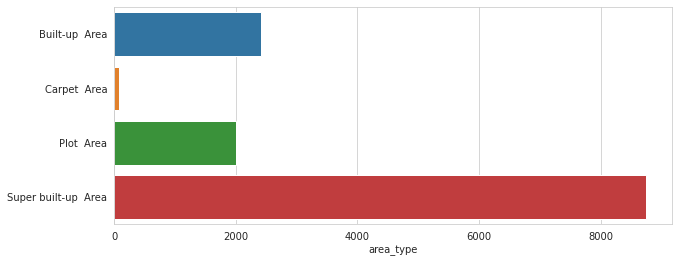

In [50]:

sns.set_style('whitegrid')
plt.figure(figsize=(10,4))
sns.barplot(
    x=train['area_type'].value_counts(),
    y=train['area_type'].value_counts().to_frame().index,
    data=train)

In [51]:
train.groupby('location')['price'].mean()

location
 Anekal                 1.600000e+06
 Banaswadi              3.500000e+06
 Basavangudi            5.000000e+06
 Bhoganhalli            2.289000e+06
 Devarabeesana Halli    1.248333e+07
                            ...     
t.c palya               1.600000e+07
tc.palya                6.075000e+06
vinayakanagar           2.000000e+07
white field,kadugodi    2.750000e+07
whitefiled              3.273000e+06
Name: price, Length: 1303, dtype: float64

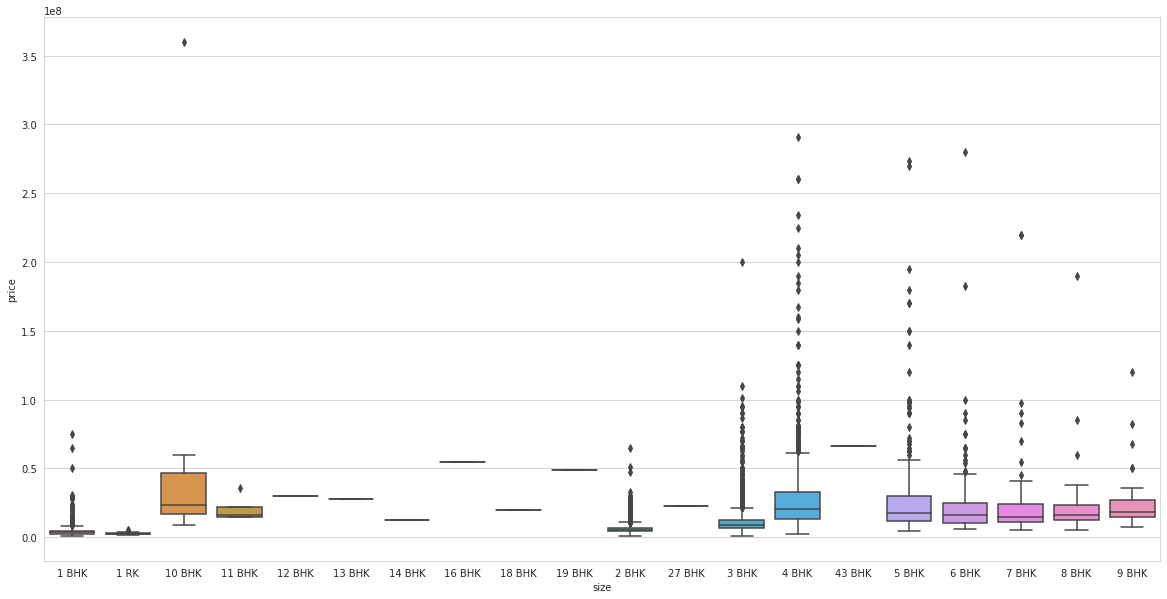

In [52]:
plt.figure(figsize=(20,10))
sns.boxplot(
    x=train['size'],
    y=train['price'],
    data=train
)

In [53]:
train.groupby('location')['price'].count()

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: price, Length: 1303, dtype: int64

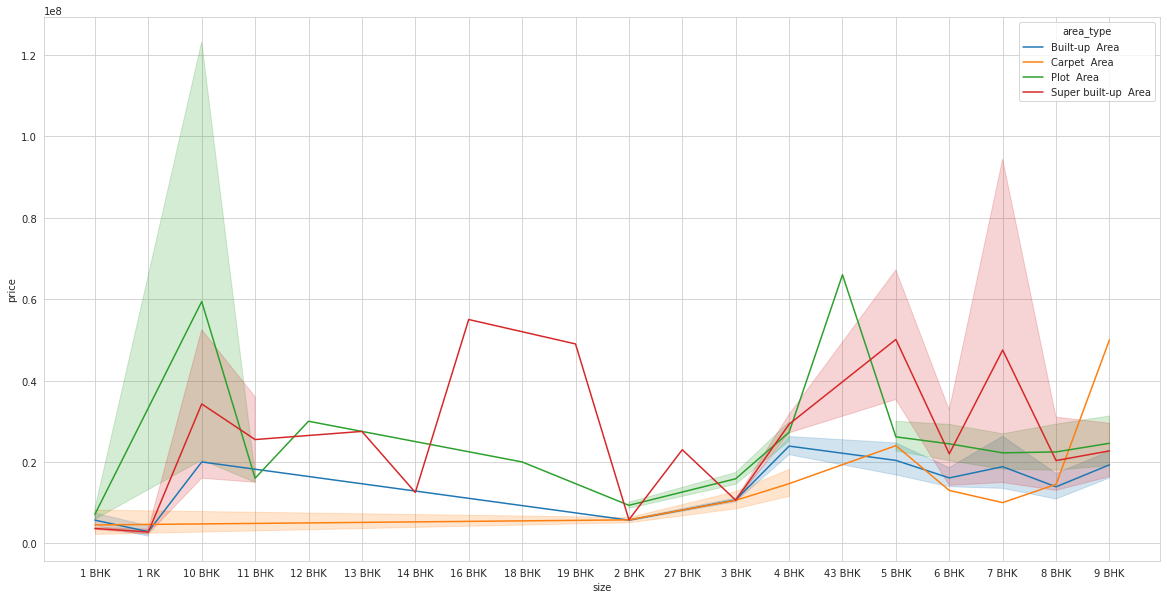

In [54]:
plt.figure(figsize=(20,10))
sns.lineplot(
    x=train['size'],
    y=train['price'],
    #hue=train['location']
    hue=train['area_type']
   
   
    
    
    
)

Text(0.5, 1.0, 'Distribution of availability of units throughtout the year')

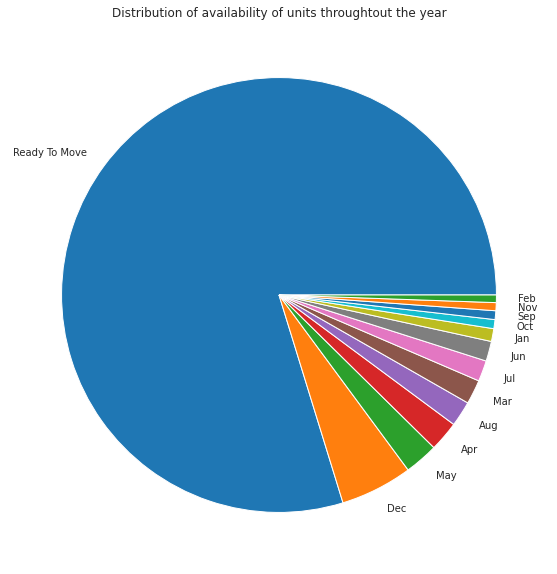

In [55]:
plt.figure(figsize=(10,10))
plt.pie(x=train['availability'].value_counts(),labels=train['availability'].value_counts().index)
plt.title('Distribution of availability of units throughtout the year')

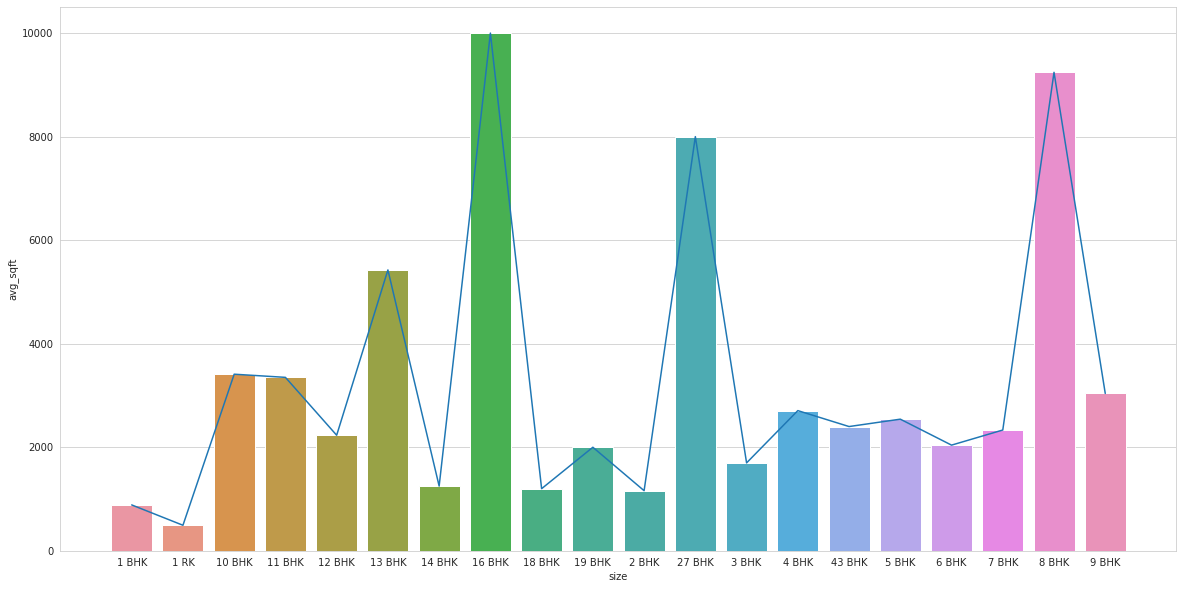

In [56]:
plt.figure(figsize=(20,10))
g=sns.barplot(x=train.groupby('size')['avg_sqft'].mean().index,y=train.groupby('size')['avg_sqft'].mean())
sns.lineplot(ax=g,x=train.groupby('size')['avg_sqft'].mean().index,y=train.groupby('size')['avg_sqft'].mean())

In [57]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 6.5MB/s 
     |████████████████████████████████| 6.6MB 16.7MB/s 
     |████████████████████████████████| 15.3MB 223kB/s 


In [58]:
import geopandas as gpd
import re


In [59]:
bbmp=gpd.read_file('/content/drive/MyDrive/Remote sensing project/BBMP/BBMP.shp')

In [60]:
bbmp.head()

,Administra,Administ_1,Administ_2,Administ_3,Administ_4,Administ_5,Administ_6,Administ_7,Administ_8,Administ_9,Adminis_10,Adminis_11,Adminis_12,Adminis_13,Adminis_14,Adminis_15,Adminis_16,Adminis_17,Adminis_18,geometry
0,4892,2003116,116,Nilasandra,2003,None,None,None,None,271,203,2003,BBMP,CC,20,SA,2020-07-10,VIDYA,2020-07-30,"POLYGON ((784281.988 1432946.082, 784275.066 1..."
1,4939,2003163,163,Katriguppe,2003,None,None,None,None,271,203,2003,BBMP,CC,20,SA,2020-07-10,VIDYA,2020-07-30,"POLYGON ((777497.925 1431826.501, 777491.991 1..."
2,4942,2003166,166,Karisandra,2003,None,None,None,None,271,203,2003,BBMP,CC,20,SA,2020-07-10,VIDYA,2020-07-30,"POLYGON ((779911.576 1430892.319, 779912.890 1..."
3,4792,2003016,16,Jalahalli,2003,None,None,None,None,271,203,2003,BBMP,CC,20,SA,2020-07-10,VIDYA,2020-07-30,"POLYGON ((776323.791 1444681.119, 776346.768 1..."
4,4967,2003191,191,Singasandra,2003,None,None,None,None,271,203,2003,BBMP,CC,20,SA,2020-07-10,VIDYA,2020-07-30,"POLYGON ((790184.783 1426796.255, 790177.387 1..."


In [82]:
train['location'].unique().tolist()

['Electronic City Phase II',
 'Chikka Tirupathi',
 'Uttarahalli',
 'Lingadheeranahalli',
 'Kothanur',
 'Whitefield',
 'Old Airport Road',
 'Rajaji Nagar',
 'Marathahalli',
 'Gandhi Bazar',
 '7th Phase JP Nagar',
 'Gottigere',
 'Sarjapur',
 'Mysore Road',
 'Bisuvanahalli',
 'Raja Rajeshwari Nagar',
 'Ramakrishnappa Layout',
 'Manayata Tech Park',
 'Kengeri',
 'Binny Pete',
 'Thanisandra',
 'Bellandur',
 ' Thanisandra',
 'Mangammanapalya',
 'Electronic City',
 'Ramagondanahalli',
 'Yelahanka',
 'Hebbal',
 'Kasturi Nagar',
 'Kanakpura Road',
 'Electronics City Phase 1',
 'Kundalahalli',
 'Chikkalasandra',
 'Murugeshpalya',
 'Sarjapur  Road',
 'Ganga Nagar',
 'HSR Layout',
 'Doddathoguru',
 'KR Puram',
 'Himagiri Meadows',
 'Adarsh Nagar',
 'Bhoganhalli',
 'Lakshminarayana Pura',
 'Begur Road',
 'Govindaraja Nagar Ward',
 'Tharabanahalli',
 'Varthur',
 'Bommanahalli',
 'Gunjur',
 'Devarachikkanahalli',
 'Double Road',
 'Hegde Nagar',
 'Haralur Road',
 'Hennur Road',
 'Kothannur',
 'Kalena 

In [81]:
dist=bbmp['Administ_3'].unique().tolist()
dist
#[i.split(' ')[0] for i in dist]

['Nilasandra',
 'Katriguppe',
 'Karisandra',
 'Jalahalli',
 'Singasandra',
 'Agrahara Dasarahalli',
 'Chowdeshwari Ward',
 'Suddagunte Palya',
 'Vishwanatha Nagenahalli',
 'Vrisabhavathi Nagar',
 'Garudachar Palya',
 'Banashankari Temple Ward',
 'Srinagara',
 'Jayamahal',
 'Kuvempu Nagar',
 'Aramane Nagar',
 'Muneshwara Nagar',
 'Rajajinagar',
 'Hosakerehalli',
 'Azad Nagar',
 'Chikkalsandra',
 'Benniganahalli',
 'K R Market',
 'Binnipete',
 'Peenya Industrial Area',
 'Bellanduru',
 'Shanthi Nagar',
 'Jayanagara',
 'Jnana Bharathi Ward',
 'HMT Ward',
 'Shakambari Nagar',
 'B T M Layout',
 'Mudalapalya',
 'Ullalu',
 'Hanumanth Nagar',
 'Malleswaram',
 'Thanisandra',
 'Jakkasandra',
 'Yelahanka Satellite Town',
 'Gurappanapalya',
 'HAL Airport',
 'Radhakrishna Temple',
 'Banasavadi',
 'Byatarayanapura',
 'Marattahalli',
 'Jogapalya',
 'Kacharkanahalli',
 'Ramamurthy Nagar',
 'Deepanjali Nagara',
 'Dayananda Nagar',
 'Vidyaranyapura',
 'HBR Layout',
 'Shivaji Nagar',
 'Hagadur',
 'Sampang

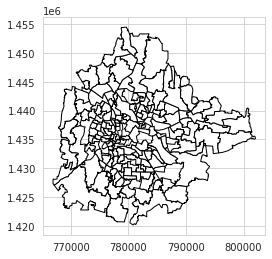

In [71]:
g=bbmp.plot(color='white',edgecolor='black')

In [ ]:
price=train.groupby('location')['price'].mean().to_frame()
price.head()

,price
location,
Anekal,1.600000e+06
Banaswadi,3.500000e+06
Basavangudi,5.000000e+06
Bhoganhalli,2.289000e+06
Devarabeesana Halli,1.248333e+07


In [ ]:
real_estate=pd.merge(bbmp,price,left_on='Administ_3',right_index=True,how='left')

In [ ]:

real_estate.plot(column='price',legend=True,edgecolor='black',figsize=(20,10))
#bbmp.plot(color='white',edgecolor='black')

NameError: ignored

## Data Preprocessing

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 81kB 9.7MB/s 


In [ ]:
from category_encoders import *

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X.head()

NameError: ignored

In [ ]:
X=train.drop('price',axis=1)
y=train[['price']]
enc=TargetEncoder(cols=['location','size'])
train_num_encoded=enc.fit_transform(X,y)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
enc.get_params()

{'cols': ['location', 'size'],
 'drop_invariant': False,
 'handle_missing': 'value',
 'handle_unknown': 'value',
 'min_samples_leaf': 1,
 'return_df': True,
 'smoothing': 1.0,
 'verbose': 0}

In [ ]:
# Save the Modle to file in the current working directory
import pickle
Pkl_Filename = "/content/drive/MyDrive/Remote sensing project/enc.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(enc, file)

## Check for encoder

In [ ]:
kop=pd.DataFrame({'area_type':'Super built-up Area','location':'Whitefield','size':'5 BHK','society':'Coomee','avg_sqft':1056},index=['1'])
kop

,area_type,location,size,society,avg_sqft
1,Super built-up Area,Whitefield,5 BHK,Coomee,1056


In [ ]:
kk=enc.transform(kop)

In [ ]:
kk['area_type']=kk['area_type'].astype('category')

In [ ]:
kk.dtypes

area_type    category
location      float64
size          float64
society       float64
avg_sqft        int64
dtype: object

In [ ]:
dd=pd.DataFrame({'area_type_Carpet Area':[1,0,0,0],'area_type_Plot Area':[0,1,0,0],'area_type_Super built-up Area':[0,0,1,0]},index=['Carpet Area','Plot Area','Super built-up Area','Built-up Area'])
pd.merge(kk,dd,left_on='area_type',right_index=True,how='left')

,area_type,location,size,society,avg_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
1,Super built-up Area,1.281695e+07,2.803561e+07,1.123748e+07,1056,0,0,1


In [ ]:
cols_to_transform = kk.select_dtypes(include=['category','uint8']).columns
tt = pd.get_dummies(columns=cols_to_transform, data=kk, prefix=cols_to_transform, prefix_sep="_",drop_first=True)
tt

,location,size,society,avg_sqft
1,1.281695e+07,2.803561e+07,1.123748e+07,1056


## Resume

In [ ]:
cols_to_transform = train_num_encoded.select_dtypes(include=['category','uint8']).columns
train_merged = pd.get_dummies(columns=cols_to_transform, data=train_num_encoded, prefix=cols_to_transform, prefix_sep="_",drop_first=True)

In [ ]:
train_merged

,location,size,avg_sqft,area_type_Carpet Area,area_type_Plot Area
0,4.740687e+06,5.958255e+06,1056.0,0,0
1,1.150159e+07,2.715440e+07,2600.0,0,1
2,6.125253e+06,1.109826e+07,1440.0,0,0
3,1.153483e+07,1.109826e+07,1521.0,0,0
4,9.563030e+06,5.958255e+06,1200.0,0,0
...,...,...,...,...,...
13315,1.281695e+07,2.803561e+07,3453.0,0,0
13316,2.111836e+07,2.715440e+07,3600.0,0,0
13317,6.471404e+06,5.958255e+06,1141.0,0,0
13318,1.406314e+07,2.715440e+07,4689.0,0,0


## Model Building

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.linear_model import LinearRegression

In [ ]:
X = train_merged
y = train.loc[:,'price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) 

In [ ]:
X_train

,location,size,avg_sqft,area_type_Carpet Area,area_type_Plot Area
12648,5.497238e+06,5.958255e+06,1125.0,0,0
11659,5.035054e+06,1.109826e+07,1365.0,0,0
6763,1.123748e+07,2.239276e+07,2400.0,0,1
5512,1.065841e+07,5.958255e+06,1128.0,0,0
11934,3.857143e+06,5.958255e+06,614.0,0,0
...,...,...,...,...,...
5255,1.310521e+07,2.715440e+07,2800.0,0,0
12331,9.542278e+06,2.715440e+07,1672.0,0,1
1360,1.191555e+07,1.109826e+07,1739.0,0,0
11725,7.358321e+06,5.958255e+06,1070.0,0,0


## ANN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

mlp_model = Sequential()

mlp_model.add(Dense(32, input_dim=7, activation='tanh'))
mlp_model.add(Dense(1, activation='linear'))
mlp_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 32)                256       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt=SGD(learning_rate=0.001)
mlp_model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mse'])
x=mlp_model.fit(X_train, y_train, epochs=50,batch_size=1)

Epoch 1/50
9266/9266 [==============================] - 10s 1ms/step - loss: 78.6284 - mse: 27442.3065
Epoch 2/50
9266/9266 [==============================] - 10s 1ms/step - loss: 63.2860 - mse: 25657.1180
Epoch 3/50
9266/9266 [==============================] - 9s 942us/step - loss: 63.0980 - mse: 23297.5840
Epoch 4/50
9266/9266 [==============================] - 9s 996us/step - loss: 61.3558 - mse: 20214.7298
Epoch 5/50
9266/9266 [==============================] - 9s 964us/step - loss: 62.8331 - mse: 23303.0136
Epoch 6/50
9266/9266 [==============================] - 9s 1ms/step - loss: 63.8081 - mse: 25202.9565
Epoch 7/50
9266/9266 [==============================] - 9s 974us/step - loss: 64.3675 - mse: 25377.9338
Epoch 8/50
9266/9266 [==============================] - 9s 923us/step - loss: 63.6427 - mse: 24421.9541
Epoch 9/50
9266/9266 [==============================] - 9s 962us/step - loss: 64.9538 - mse: 24030.2281
Epoch 10/50
9266/9266 [==============================] - 9s 924us/st

## DT

In [ ]:
clf = DecisionTreeRegressor(max_depth=9)

clf = clf.fit(X_train, y_train)

In [ ]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print("The Mean Absolute Percentage Error on train dataset: {} \n".format(mean_absolute_percentage_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Absolute Percentage Error on test dataset: {} \n".format(mean_absolute_percentage_error(y_pred=test_pred,y_true=y_test)))

The Mean Absolute Percentage Error on train dataset: 22.034900927703337 

The Mean Absolute Percentage Error on test dataset: 26.394445025713754 



In [ ]:
# Save the Modle to file in the current working directory
import pickle
Pkl_Filename = "/content/drive/MyDrive/Remote sensing project/DT.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(clf, file)

## Linear Regression

In [ ]:
linreg=LinearRegression()
lr=linreg.fit(X_train, y_train)

In [ ]:
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print("The Mean Absolute Percentage Error on train dataset: {} \n".format(mean_absolute_percentage_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Absolute Percentage Error on test dataset: {} \n".format(mean_absolute_percentage_error(y_pred=test_pred,y_true=y_test)))

The Mean Absolute Percentage Error on train dataset: 45.400348796630766 

The Mean Absolute Percentage Error on test dataset: 46.069741408168824 



In [ ]:
# Save the Modle to file in the current working directory
import pickle
Pkl_Filename = "/content/drive/MyDrive/Remote sensing project/LR.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(lr, file)

In [ ]:
test=pd.DataFrame({'area_type':'Carpet Area','location':'Electronic City Phase II','size':'2BHK','avg_sqft':1000},index=['1'])

In [ ]:
test=enk.transform(test)

In [ ]:
test

,area_type,location,size,avg_sqft
1,Carpet Area,4.740687e+06,1.123748e+07,1000


In [ ]:
area_type=pd.DataFrame({'area_type_Carpet Area':[1,0,0],'area_type_Plot Area':[0,1,0]},index=['Carpet Area','Plot Area','Built-up  Area'])


In [ ]:
test=pd.merge(test,area_type,left_on='area_type',right_index=True,how='left')
test

,area_type,location,size,avg_sqft,area_type_Carpet Area,area_type_Plot Area
1,Carpet Area,4.740687e+06,1.123748e+07,1000,1,0


In [ ]:
test.drop('area_type',axis=1,inplace=True)
test

,location,size,avg_sqft,area_type_Carpet Area,area_type_Plot Area
1,4.740687e+06,1.123748e+07,1000,1,0


In [ ]:
model = pickle.load(open('/content/drive/MyDrive/Remote sensing project/DT.pkl', 'rb'))
enk = pickle.load(open('/content/drive/MyDrive/Remote sensing project/enc.pkl', 'rb'))

In [ ]:
price=lr.predict(test)

In [ ]:
price[0]

3865383.514305776